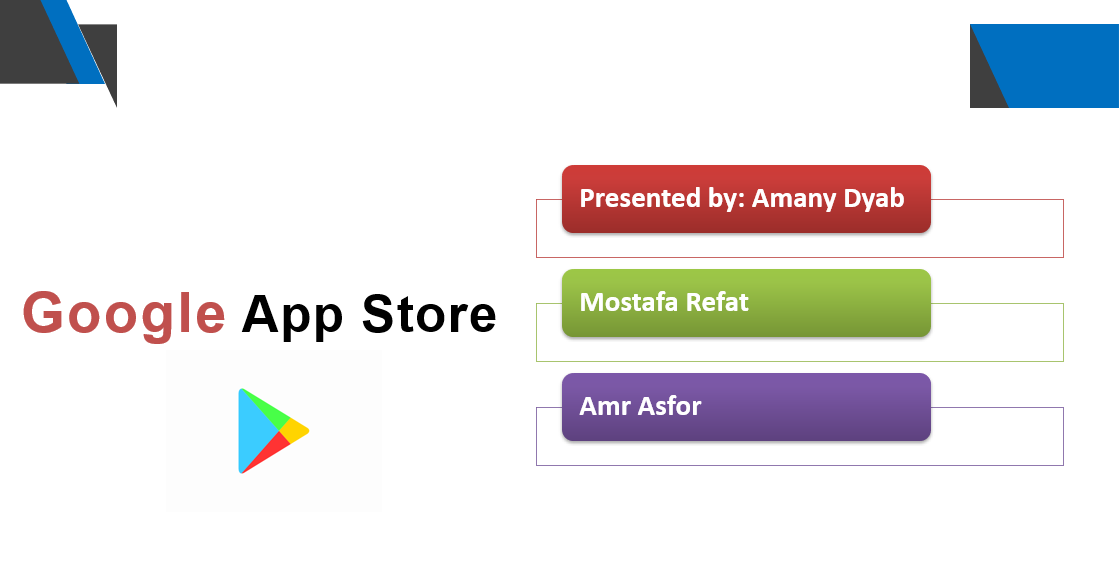

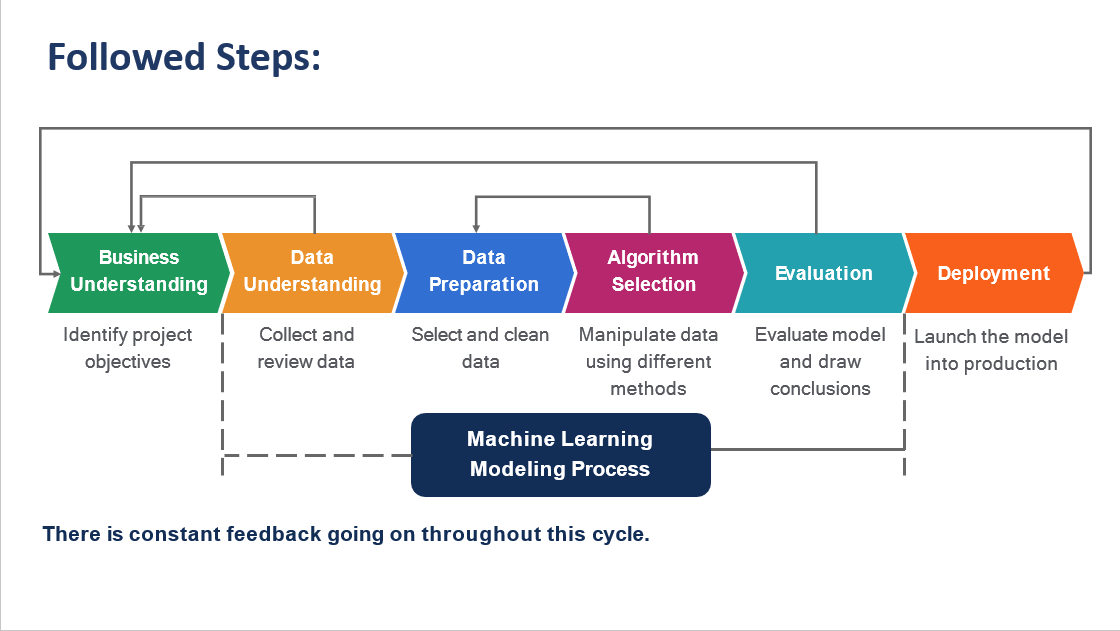

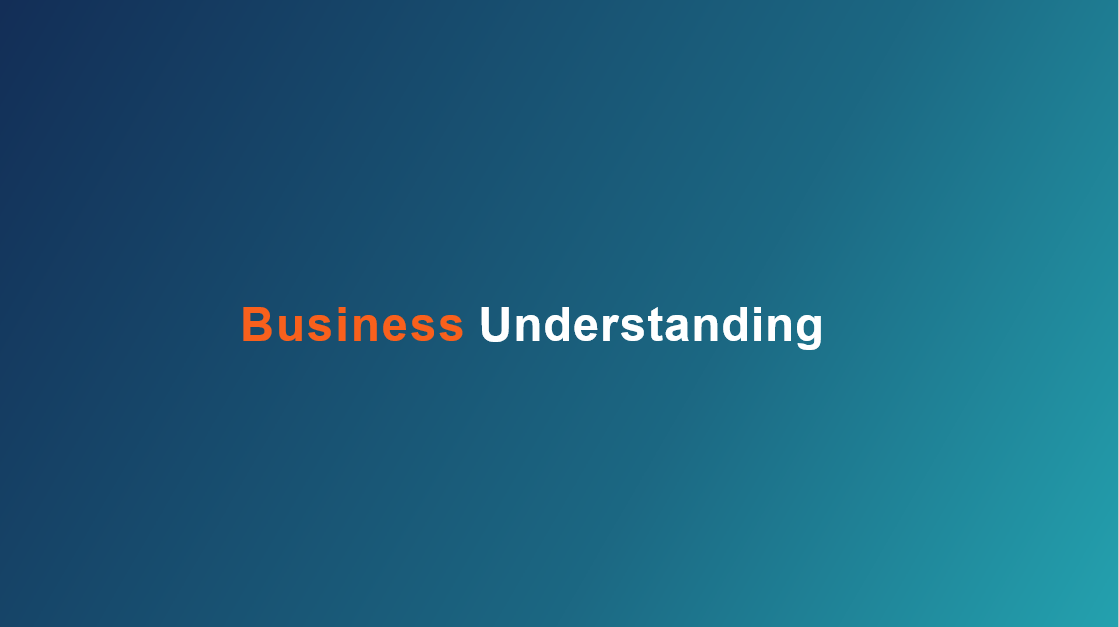

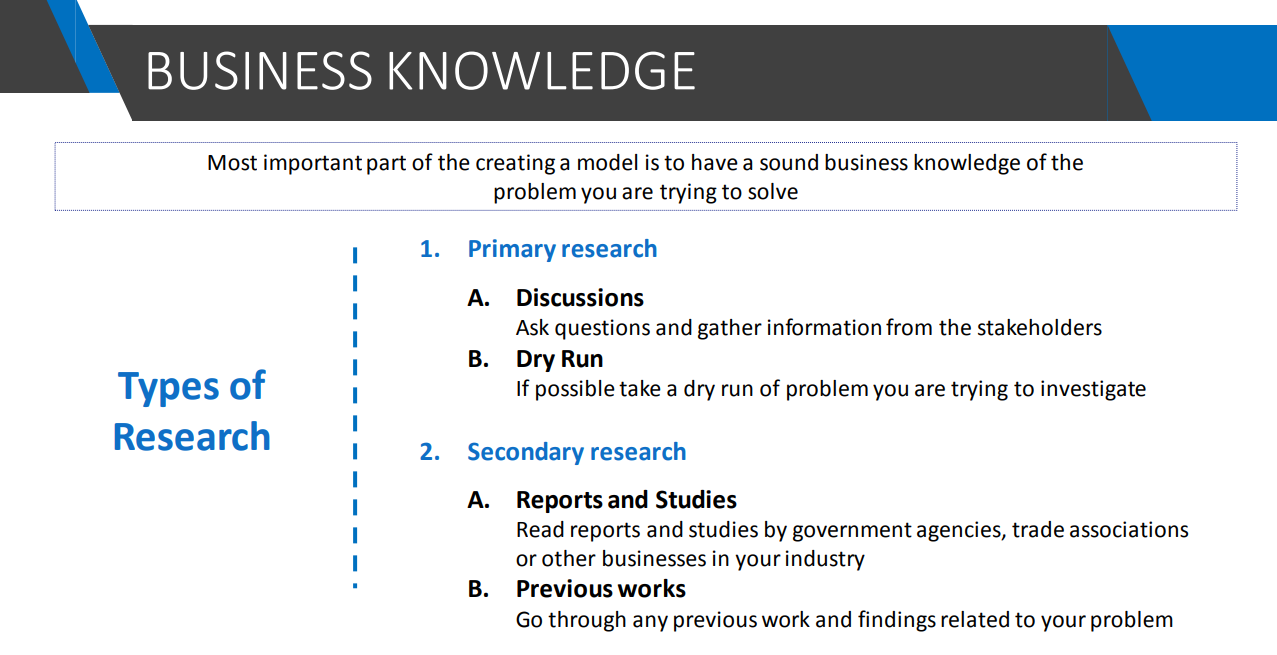

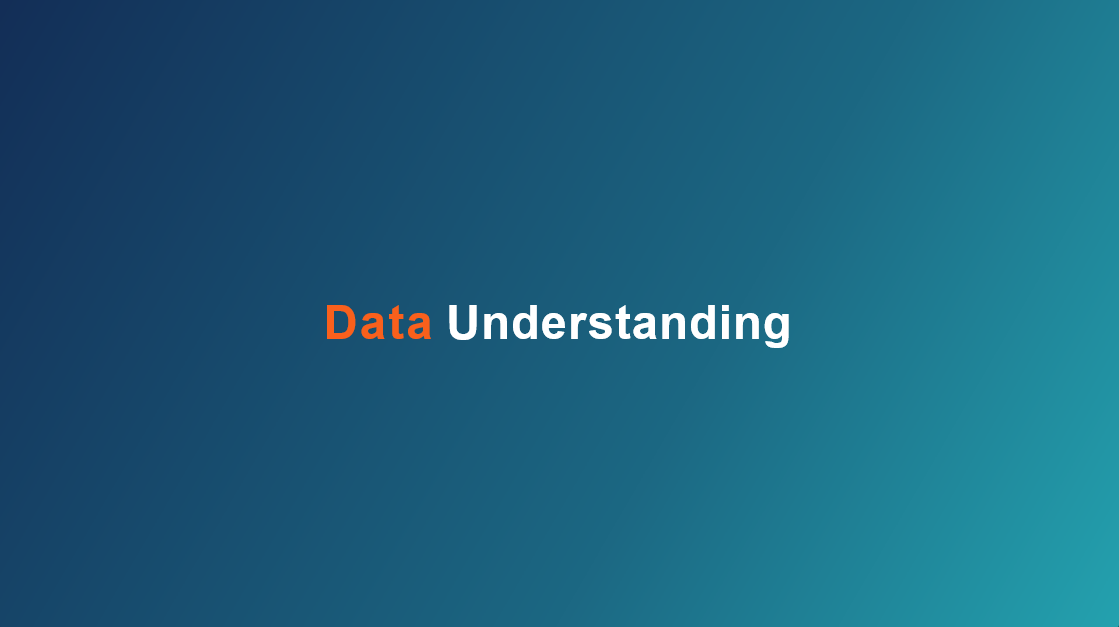

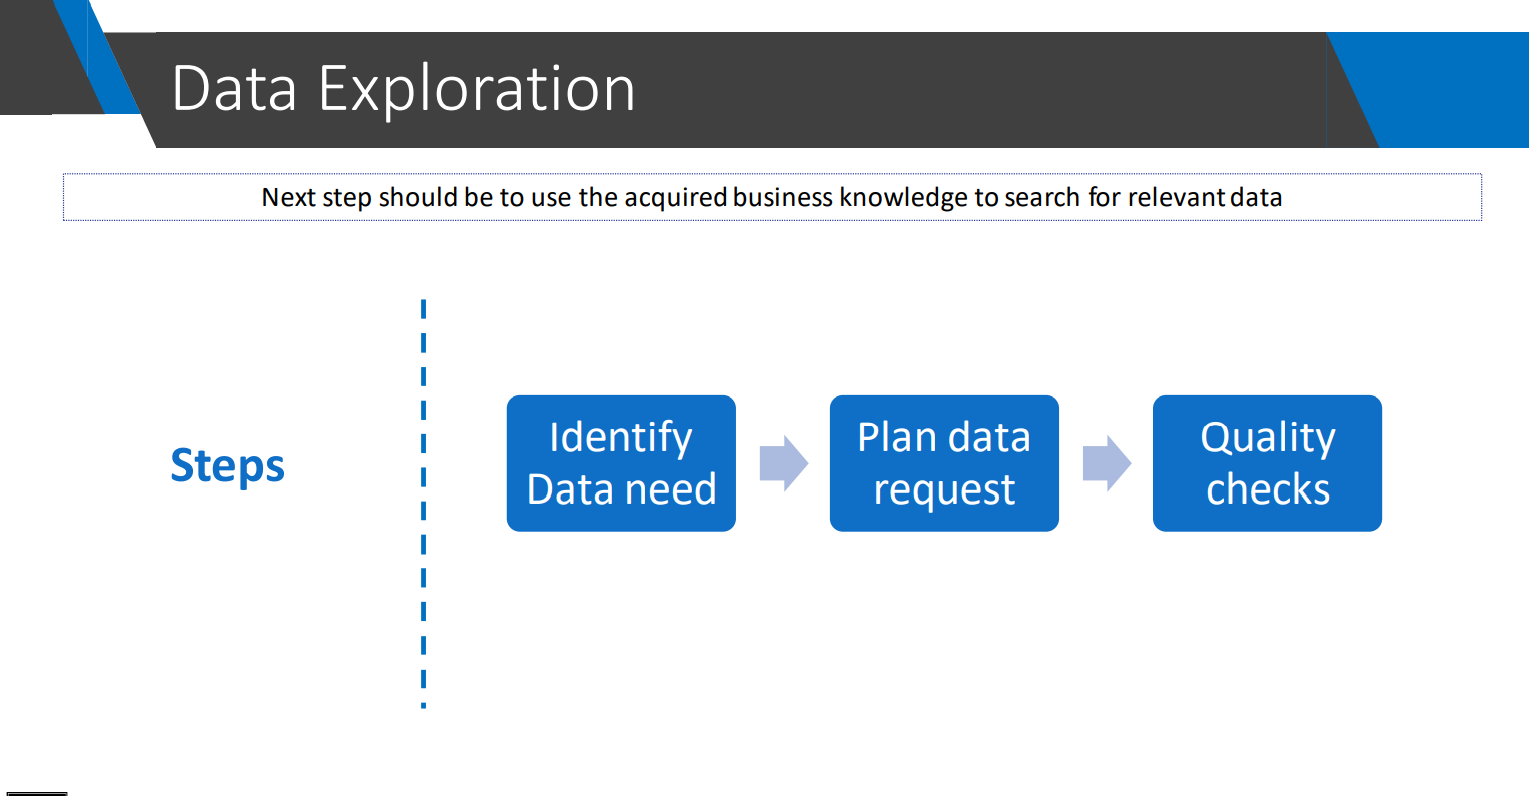

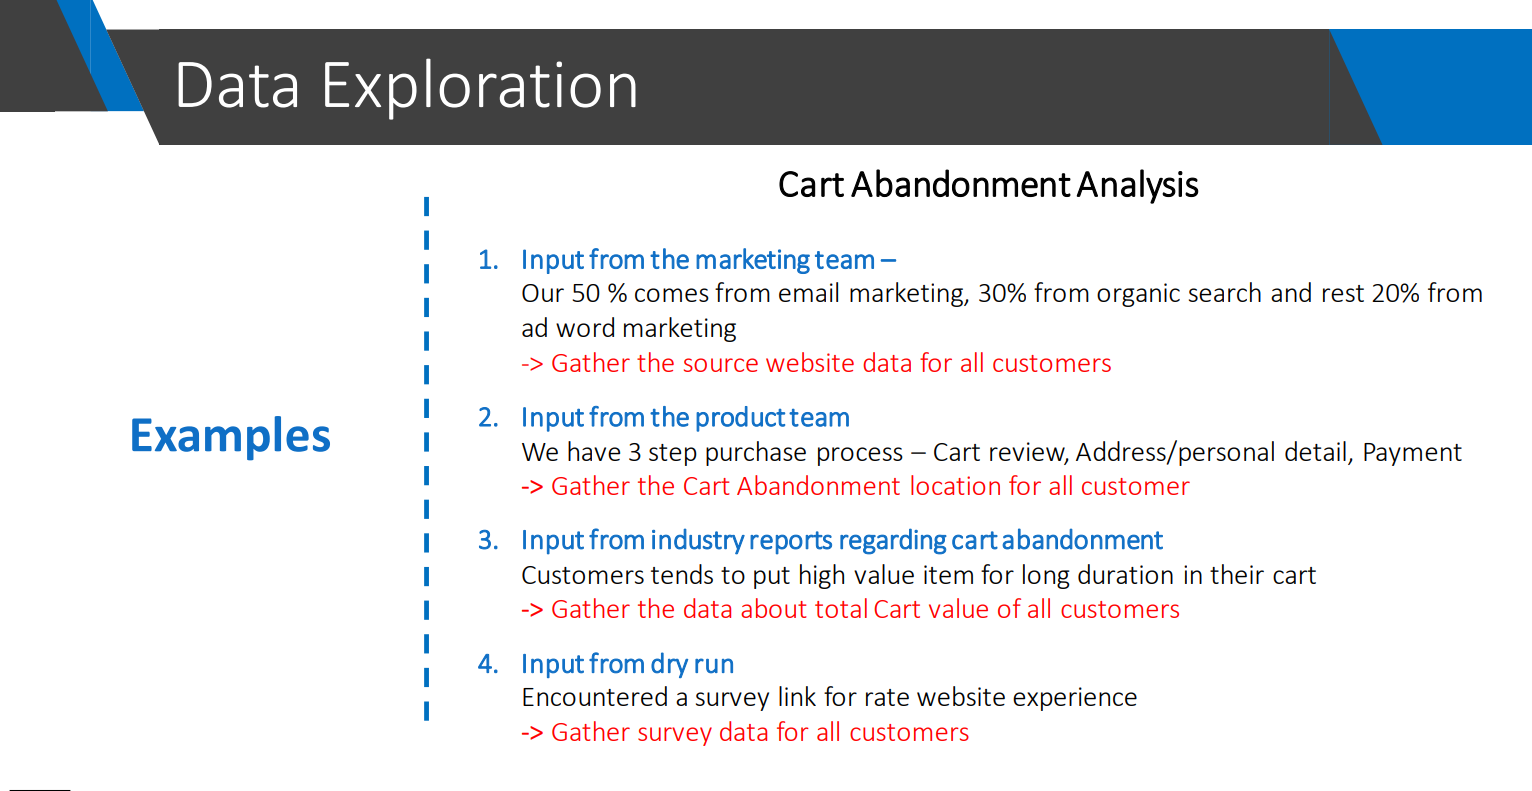

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [4]:
df = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


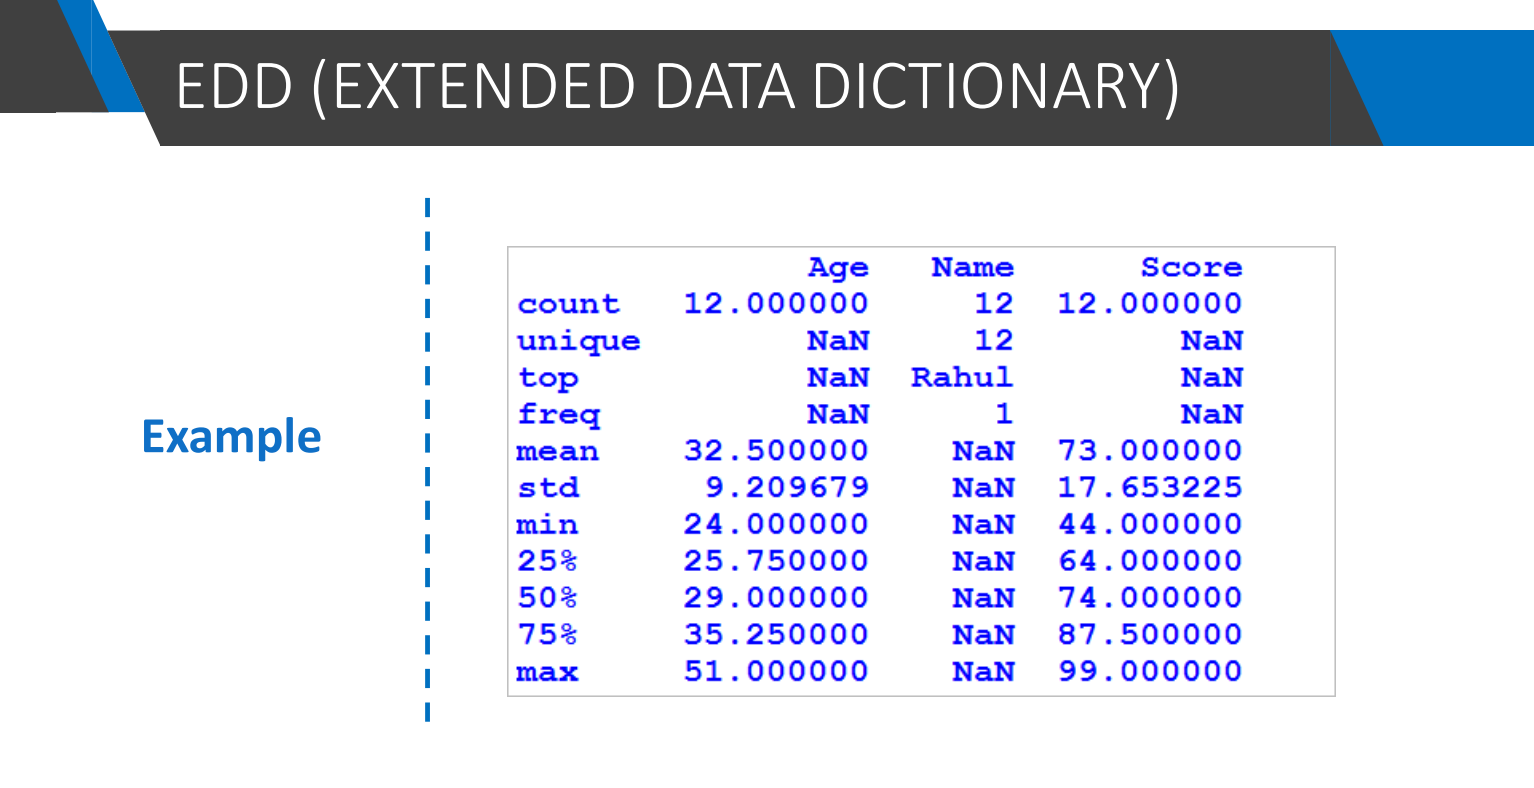

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.shape

(10841, 13)

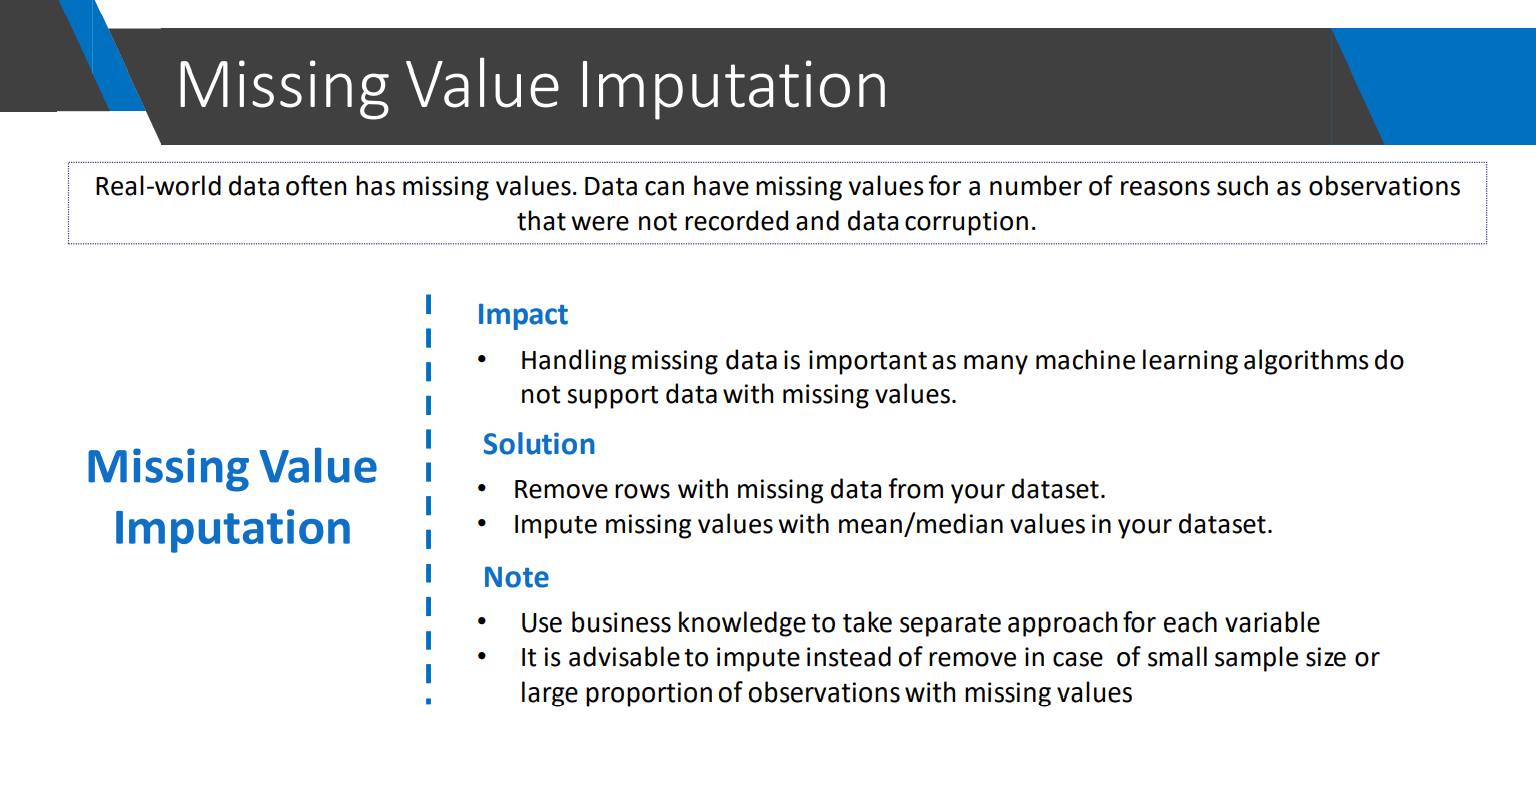

In [9]:
df.rename(columns={'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver','Android Ver':'Android_Ver'}, inplace=True)

In [10]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


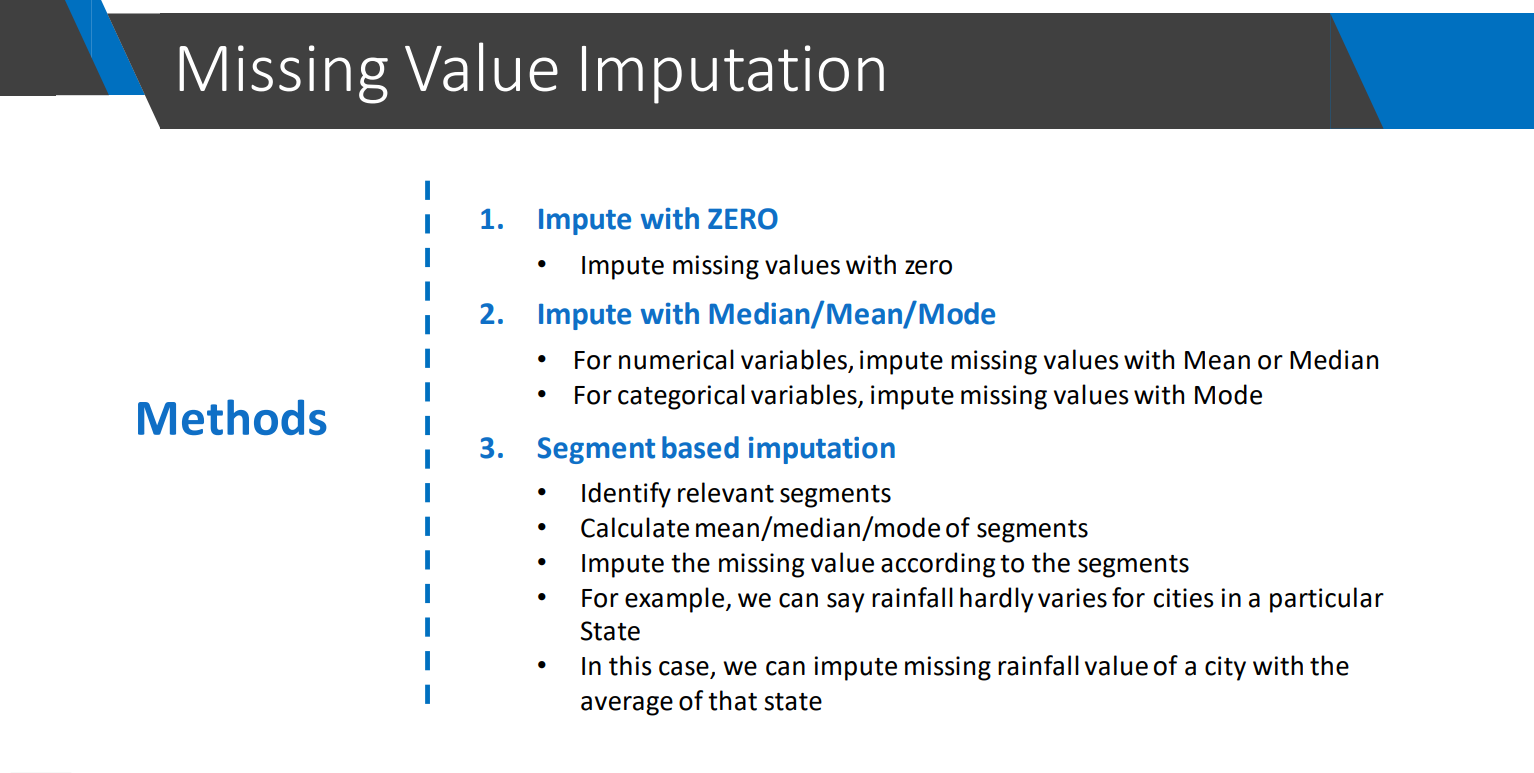

In [11]:
df[df.Rating.isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [12]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
df[df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df.drop(10472,axis=0,inplace=True)

In [15]:
df[df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [16]:
df.Reviews = df.Reviews.astype(int)

In [17]:
Applications = df[df.Rating.isnull()].App
reviews_applications = reviews.App.unique()
for i in Applications:
        if i in reviews_applications:
            print(i)

Blood Pressure


In [18]:
df[df.App == 'Blood Pressure']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2310,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up


In [19]:
df.iloc[2513,2]=df[df.App == 'Blood Pressure'].Rating.mean()

In [20]:
df[df.App == 'Blood Pressure']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2310,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
2513,Blood Pressure,MEDICAL,4.2,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up


In [21]:
drp = df[df.Rating.isnull()].index

In [22]:
drp = list(drp)
df.drop(drp, inplace = True)

In [23]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
3752,ARY NEWS,NEWS_AND_MAGAZINES,4.4,2959,9.8M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 4, 2018",7.5.0,4.1 and up
2687,"Club Factory Everything, Unbeaten Price",SHOPPING,4.2,244141,7.3M,"10,000,000+",Free,0,Everyone,Shopping,"August 6, 2018",4.4.5,4.3 and up
5828,A-Y Collection,SHOPPING,5.0,2,2.9M,100+,Free,0,Teen,Shopping,"February 16, 2018",1.2,4.1 and up
8992,DW Audio,FAMILY,4.9,38,5.0M,"1,000+",Free,0,Everyone,Education,"June 16, 2017",0.9.0,4.1 and up
950,Lifetime - Watch Full Episodes & Original Movies,ENTERTAINMENT,4.0,35931,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up


In [24]:
lds = np.array(df.Size.str.find('k'))

In [25]:
ls = np.where(lds>0) #list of indexes where size is in kb

In [26]:
#convert an entire column string to a float within a dataframe
df.Size = df.Size.str.replace('M','');
df.Size = df.Size.str.replace('k','');

In [27]:
df_temp = df.copy()

In [28]:
df_temp.drop(df[df.Size == 'Varies with device'].index,axis=0, inplace=True)

In [29]:
df_temp.Size = df_temp.Size.astype('float') 

In [30]:
df.reset_index(False,inplace=True)

In [31]:
df.drop('index',axis=1, inplace=True)

In [32]:
for x,y in df.iterrows():
    if y.Size == 'Varies with device':
        val = y.Category
        df.iloc[x,4]=df_temp.groupby('Category').Size.median()[val]

In [33]:
df.Size = df.Size.astype('float')

In [34]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
521,BBWCupid - BBW Dating App,DATING,3.5,241,2.8,"50,000+",Free,0,Mature 17+,Dating,"June 1, 2018",2.2.0.1748,5.0 and up


In [35]:
for x in ls:
    df.iloc[x,4]=df.iloc[x,4]*0.001
    
#Size column is ready

In [36]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [37]:
df.Installs=df.Installs.str.replace('+','')
df.Installs=df.Installs.str.replace(',','')

In [38]:
df.Installs=df.Installs.astype('int')

In [39]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4634,Z App,LIFESTYLE,2.8,405,25.0,50000,Free,0,Everyone,Lifestyle,"June 22, 2018",4.2.45,4.4 and up


In [40]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [41]:
df.Price = df.Price.str.replace('$', '')

In [42]:
df.Price = df.Price.astype('float')

In [43]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [44]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12.0,1000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.0.15,4.0 and up
6420,Inwestor mobile,FINANCE,3.2,124,7.2,10000,Free,0.0,Everyone,Finance,"January 3, 2018",1.2.3,4.1 and up
7323,DC Comics,COMICS,4.2,25673,10.0,1000000,Free,0.0,Teen,Comics,"June 5, 2018",Varies with device,Varies with device
5594,BC Wildflowers,FAMILY,4.4,7,81.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",3.5,4.1 and up
30,Art Drawing Ideas,ART_AND_DESIGN,4.1,227,5.2,50000,Free,0.0,Everyone,Art & Design,"May 31, 2018",1.2,2.3 and up


In [45]:
temp = np.array(df.Genres.str.find(';'))
ls = np.where(temp>0) #Finding out the Indexes where there are multiple genres

In [46]:
df2 = df.iloc[np.r_[ls],:]  #Copying only those indexes to another dataframe to split them

In [47]:
df.shape

(9367, 13)

In [48]:
df2.shape

(483, 13)

In [49]:
df.iloc[np.r_[1,4,9,25],:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up


In [50]:
df.Genres = df.Genres.apply(lambda x: x.split(';')[0])

In [51]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
35,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [52]:
df2.Genres = df2.Genres.apply(lambda x: x.split(';')[1])

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Creativity,"October 11, 2017",1.0.8,4.0.3 and up
35,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Creativity,"August 2, 2018",1.0.9,4.4 and up


In [54]:
df = df.append(df2, ignore_index=True)

In [55]:
df.shape

(9850, 13)

In [56]:
del df2

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9850 non-null   object 
 1   Category        9850 non-null   object 
 2   Rating          9850 non-null   float64
 3   Reviews         9850 non-null   int32  
 4   Size            9850 non-null   float64
 5   Installs        9850 non-null   int32  
 6   Type            9850 non-null   object 
 7   Price           9850 non-null   float64
 8   Content_Rating  9850 non-null   object 
 9   Genres          9850 non-null   object 
 10  Last_Updated    9850 non-null   object 
 11  Current_Ver     9846 non-null   object 
 12  Android_Ver     9848 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 923.6+ KB


In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up


In [59]:
df.Last_Updated = pd.to_datetime(df['Last_Updated']) 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9850 non-null   object        
 1   Category        9850 non-null   object        
 2   Rating          9850 non-null   float64       
 3   Reviews         9850 non-null   int32         
 4   Size            9850 non-null   float64       
 5   Installs        9850 non-null   int32         
 6   Type            9850 non-null   object        
 7   Price           9850 non-null   float64       
 8   Content_Rating  9850 non-null   object        
 9   Genres          9850 non-null   object        
 10  Last_Updated    9850 non-null   datetime64[ns]
 11  Current_Ver     9846 non-null   object        
 12  Android_Ver     9848 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 923.6+ KB


In [61]:
ind = df[df['Current_Ver']=='Varies with device'].index

In [62]:
df.Current_Ver.mode()

0    Varies with device
dtype: object

In [63]:
df_t = df.copy()

In [64]:
df_t.drop(ind, axis=0, inplace=True)

In [65]:
df_t.Current_Ver.mode()

0    1.0
dtype: object

In [66]:
df.Current_Ver = df.Current_Ver.replace('Varies with device', '1.0')

In [67]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [68]:
df.drop('Android_Ver', axis=1, inplace=True)

In [69]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver
218,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,11.0,5000000,Free,0.00,Everyone,Business,2018-02-26,1.0
225,Box,BUSINESS,4.2,159872,11.0,10000000,Free,0.00,Everyone,Business,2018-07-31,1.0
228,Google My Business,BUSINESS,4.4,70991,11.0,5000000,Free,0.00,Everyone,Business,2018-07-24,2.19.0.204537701
245,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.00,Everyone,Business,2018-07-20,4.1.28165.0716
250,join.me - Simple Meetings,BUSINESS,4.0,6989,11.0,1000000,Free,0.00,Everyone,Business,2018-07-16,4.3.0.508
...,...,...,...,...,...,...,...,...,...,...,...,...
9783,Cursive Writing Wizard - Handwriting,FAMILY,4.0,3745,31.0,1000000,Free,0.00,Everyone,Education,2017-12-03,2.5.0
9796,Star Chart,FAMILY,4.3,128808,24.0,10000000,Free,0.00,Everyone,Education,2018-08-02,1.0
9805,EF Spelling Bee,FAMILY,3.0,2,9.4,500,Free,0.00,Everyone,Education,2017-10-12,1.2.2
9807,EG Classroom Decimals™,FAMILY,3.0,2,18.0,50,Paid,2.99,Everyone,Education,2017-06-12,2.2.2


In [70]:
df.drop_duplicates(keep='first', inplace=True)

In [71]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1


In [72]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       4
dtype: int64

In [73]:
df["Current_Ver"].fillna(str(df["Current_Ver"].mode().values[0]), inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9296 non-null   object        
 1   Category        9296 non-null   object        
 2   Rating          9296 non-null   float64       
 3   Reviews         9296 non-null   int32         
 4   Size            9296 non-null   float64       
 5   Installs        9296 non-null   int32         
 6   Type            9296 non-null   object        
 7   Price           9296 non-null   float64       
 8   Content_Rating  9296 non-null   object        
 9   Genres          9296 non-null   object        
 10  Last_Updated    9296 non-null   datetime64[ns]
 11  Current_Ver     9296 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(6)
memory usage: 799.0+ KB


In [75]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9291,Dolphin and fish coloring book,FAMILY,3.9,2249,24.0,500000,Free,0.0,Everyone,Creativity,2018-05-15,1.0
9292,Cake Shop - Kids Cooking,FAMILY,4.3,30668,33.0,5000000,Free,0.0,Everyone,Pretend Play,2018-07-16,2.1.3181
9293,Fun Kid Racing - Motocross,FAMILY,4.1,59768,24.0,10000000,Free,0.0,Everyone,Action & Adventure,2018-08-07,3.53
9294,Hair saloon - Spa salon,FAMILY,4.2,38473,23.0,10000000,Free,0.0,Everyone,Pretend Play,2018-04-11,1.0.5


In [76]:
#filtering the catigorical Variables
categorical_variables= df[['Content_Rating','Type','Category']]
categorical_variables

,Content_Rating,Type,Category
0,Everyone,Free,ART_AND_DESIGN
1,Everyone,Free,ART_AND_DESIGN
2,Everyone,Free,ART_AND_DESIGN
3,Teen,Free,ART_AND_DESIGN
4,Everyone,Free,ART_AND_DESIGN
...,...,...,...
9291,Everyone,Free,FAMILY
9292,Everyone,Free,FAMILY
9293,Everyone,Free,FAMILY
9294,Everyone,Free,FAMILY


In [77]:
df['Content_Rating'].value_counts()

Everyone           7460
Teen               1022
Mature 17+          411
Everyone 10+        399
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [78]:
df['Type'].value_counts()

Free    8620
Paid     676
Name: Type, dtype: int64

In [80]:
df['Category'].value_counts()

FAMILY                 2063
GAME                   1088
TOOLS                   735
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               306
PHOTOGRAPHY             304
MEDICAL                 303
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        206
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           162
DATING                  159
EDUCATION               141
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           121
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
ART_AND_DESIGN           68
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
PARENTING                60
COMICS                   59
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [81]:
#onr hot encoding for columns 'Content_Rating','Type','Category'
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(categorical_variables)
encoded_array = enc.transform(categorical_variables).toarray()
Encoded_dataframe=pd.DataFrame(encoded_array)
Encoded_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9293,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9294,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#sample of inversing it back again as string
enc.inverse_transform([Encoded_dataframe.iloc[3,:]])

array([['Teen', 'Free', 'ART_AND_DESIGN']], dtype=object)

In [83]:
#filtering the numerical variables
features=['Reviews', 'Size', 'Installs']
features = pd.DataFrame(df , columns=features)
features

,Reviews,Size,Installs
0,159,19.0,10000
1,967,14.0,500000
2,87510,8.7,5000000
3,215644,25.0,50000000
4,967,2.8,100000
...,...,...,...
9291,2249,24.0,500000
9292,30668,33.0,5000000
9293,59768,24.0,10000000
9294,38473,23.0,10000000


In [84]:
#concatenting the features together again
X = pd.concat([features, Encoded_dataframe], axis=1)
X.columns

Index([ 'Reviews',     'Size', 'Installs',          0,          1,          2,
                3,          4,          5,          6,          7,          8,
                9,         10,         11,         12,         13,         14,
               15,         16,         17,         18,         19,         20,
               21,         22,         23,         24,         25,         26,
               27,         28,         29,         30,         31,         32,
               33,         34,         35,         36,         37,         38,
               39,         40],
      dtype='object')

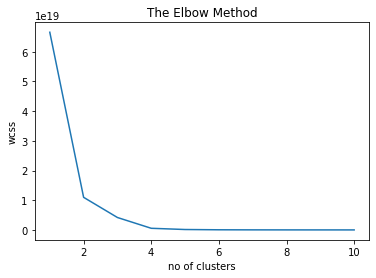

In [85]:
#clustering
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
#Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [94]:
#according to th plot it's preeferred to split the into 3 clusters
kmeans = KMeans(n_clusters=3)
k= kmeans.fit(X)
s= k.cluster_centers_
y= pd.DataFrame(s,columns=X.columns)
y

,Reviews,Size,Installs,0,1,2,3,4,5,6,...,31,32,33,34,35,36,37,38,39,40
0,2.975784e+05,22.331906,7.665217e+06,3.265839e-04,0.803723,0.042674,0.044524,0.108644,1.088613e-04,0.92641,...,3.374701e-02,3.265839e-02,0.034944,2.198998e-02,0.025147,3.113433e-02,0.078816,0.021881,0.016982,8.164598e-03
1,2.016841e+07,18.366327,1.000000e+09,0.000000e+00,0.571429,0.102041,0.000000,0.326531,-2.710505e-20,1.00000,...,0.000000e+00,8.163265e-02,0.061224,3.469447e-18,0.142857,-3.469447e-18,0.040816,0.102041,0.061224,1.734723e-18
2,9.828022e+06,25.969672,5.000000e+08,-5.421011e-20,0.803279,0.032787,0.032787,0.131148,-5.421011e-20,1.00000,...,-6.938894e-18,-1.387779e-17,0.163934,-3.469447e-18,0.098361,-6.938894e-18,0.147541,0.000000,0.049180,-1.734723e-18


In [95]:
# predicting for row number 145 wich cluster it belongs to
kmeans.predict([X.iloc[145,:]])

array([1])

In [96]:
#inversing the one hot encoding to string again to know about our clusters most common categorical features
cag= enc.inverse_transform(y.iloc[:,3:])

In [97]:
cag = pd.DataFrame(cag)
cag

,0,1,2
0,Everyone,Free,FAMILY
1,Everyone,Free,COMMUNICATION
2,Everyone,Free,GAME


In [102]:
Cetroids = pd.concat([y.iloc[:,:3], cag], axis=1)
Cetroids.columns=['Reviews', 'Size', 'Installs','Content_Rating','Type','Category']
Cetroids

,Reviews,Size,Installs,Content_Rating,Type,Category
0,2.975784e+05,22.331906,7.665217e+06,Everyone,Free,FAMILY
1,2.016841e+07,18.366327,1.000000e+09,Everyone,Free,COMMUNICATION
2,9.828022e+06,25.969672,5.000000e+08,Everyone,Free,GAME


In [ ]:
#deteriming new application what cluster it belong to
dic = {'Reviews Number':None ,'Size as a Number':None,'Count of Installs':None,'Content Rating':None,'Type (Free Or Paid)':None,' Application Category':None}
#enter the new app feature
for i,j in dic.items() :
    dic[i]=input(f'please Enter {i} ' )
#convertin the dictionary to dataframe
new = pd.DataFrame.from_dict(dic,orient='index')
new= new.transpose()

#one hot encoing for categorical features again 
encoded_array = enc.transform(new.iloc[:,3:]).toarray()
Encoded_dataframe=pd.DataFrame(encoded_array)

#collecting data together again after encoding again
X = pd.concat([new.iloc[:,:3], Encoded_dataframe], axis=1)
#predicting the cluster of the new app
pre= kmeans.predict(X)
#printing the cluster features cntroids
print(y.iloc[pre,:3],enc.inverse_transform(y.iloc[pre,3:]))

In [103]:

x=df.iloc[:,[4,7,1,6,8]]
x

,Size,Price,Category,Type,Content_Rating
0,19.0,0.0,ART_AND_DESIGN,Free,Everyone
1,14.0,0.0,ART_AND_DESIGN,Free,Everyone
2,8.7,0.0,ART_AND_DESIGN,Free,Everyone
3,25.0,0.0,ART_AND_DESIGN,Free,Teen
4,2.8,0.0,ART_AND_DESIGN,Free,Everyone
...,...,...,...,...,...
9291,24.0,0.0,FAMILY,Free,Everyone
9292,33.0,0.0,FAMILY,Free,Everyone
9293,24.0,0.0,FAMILY,Free,Everyone
9294,23.0,0.0,FAMILY,Free,Everyone


In [104]:
y=df.iloc[:,5]
y.describe()

count    9.296000e+03
mean     1.612658e+07
std      8.459240e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [105]:
regenco = OneHotEncoder(handle_unknown='ignore')
regenco.fit(x.iloc[:,2:])
encoded_array = regenco.transform(x.iloc[:,2:]).toarray()
Encoded_dataframe=pd.DataFrame(encoded_array)
Encoded_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
x.iloc[:,2:]

,Category,Type,Content_Rating
0,ART_AND_DESIGN,Free,Everyone
1,ART_AND_DESIGN,Free,Everyone
2,ART_AND_DESIGN,Free,Everyone
3,ART_AND_DESIGN,Free,Teen
4,ART_AND_DESIGN,Free,Everyone
...,...,...,...
9291,FAMILY,Free,Everyone
9292,FAMILY,Free,Everyone
9293,FAMILY,Free,Everyone
9294,FAMILY,Free,Everyone


In [107]:
x = pd.concat([x.iloc[:,[0,1]], Encoded_dataframe], axis=1)
x.columns

Index([ 'Size', 'Price',       0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,      13,
            14,      15,      16,      17,      18,      19,      20,      21,
            22,      23,      24,      25,      26,      27,      28,      29,
            30,      31,      32,      33,      34,      35,      36,      37,
            38,      39,      40],
      dtype='object')

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [111]:
reg = LinearRegression().fit(X_train, y_train)

In [112]:
pred=reg.predict(X_train)
predd=reg.predict(X_test)

In [113]:
from sklearn.metrics import r2_score
#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.05447309826312219


In [114]:
from sklearn import metrics
#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, pred)) 
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred)) 
#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd)) 
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd)) 

Train Mean Absolute Error (MAE): 24646152.46285262
Train Mean Squared Error (MSE): 6874915170199200.0
Test Mean Absolute Error (MAE): 25273400.079667136
Test Mean Squared Error (MSE): 6638096603493114.0


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

reg = RandomForestClassifier(n_estimators=10)
reg.fit(X_train,y_train)
pred=reg.predict(X_train)
predd=reg.predict(X_test)

from sklearn.metrics import r2_score
#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.9999999979849986


In [116]:
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, pred)) 
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred)) 
#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd)) 
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd)) 

Train Mean Absolute Error (MAE): 13953848.25645439
Train Mean Squared Error (MSE): 14229968.824153759
Test Mean Absolute Error (MAE): 18690079.853270225
Test Mean Squared Error (MSE): 48892166.36703958


In [118]:
predd=reg.predict(X_test)
y_test=pd.DataFrame(y_test)
y_test['Prediction']=predd
y_test

,Installs,Prediction
7262,10000,50000
31,100000,10000
1652,10000000,10000000
2499,100000,10000
3010,500000000,500000000
...,...,...
3848,10000,50000000
2929,5000000,100000
6746,100,10000000
8209,500,10000
